<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/News_nao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recherche d'articles de News via une API
Site https://newsapi.org/
Mise à jour automatique dans l'URL de l'API de la date et du thème choisi : Karaté
création d'un dataframe

In [1]:
import requests
import math
import pandas as pd

df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey={API_KEY}"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
df.to_csv("output.csv")



In [2]:
"""

from datetime import date, timedelta
today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"
  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")

nwe_date

"""

'\n\nfrom datetime import date, timedelta\ntoday = date.today() # today\nday = timedelta(days=1) # 1 day duration\n\nfor counter in range(30):\n  temp_date = today - counter*day\n  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"\n  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"\n  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")\n\nnwe_date\n\n'

In [3]:
df['url']

0      https://www.sueddeutsche.de/panorama/asien-osc...
1      https://www.businesstoday.in/entrepreneurship/...
2      https://andro4all.com/series/las-dos-novedades...
3      https://www.netzwelt.de/news/215593-mission-im...
4      https://thehillstimes.in/assam/hsoa-and-mdks-o...
                             ...                        
427    https://www.svt.se/nyheter/lokalt/ost/sportlag...
428    https://www.mmamania.com/2023/2/23/23612095/kr...
429    https://www.laut.de/Mehnersmoos/Alben/Sexy-120168
430    https://www.dagospia.com/rubrica-2/media_e_tv/...
431    https://natemat.pl/470909,lasy-panstwowe-dotow...
Name: url, Length: 432, dtype: object

In [4]:
# clean content

for _ , row in df.iterrows():
  row['content'] = " ".join(row['content'].split(" ")[:-3])

df['content'][10]

'SOYAPANGO, El Salvador -- With semiautomatic weapons pressed to their chest, a pack of camouflage-clad police officers marches through rows of small brick homes winding up hills on the fringes of El'

In [5]:
df.columns

Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')

In [6]:
# merge columns with text

df['merge_text'] = df[["content", "title", "description"]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

df

,source,author,title,description,url,urlToImage,publishedAt,content,merge_text
0,Süddeutsche Zeitung,"Von David Pfeifer, Bangkok",Gesellschaft: Irgendwie asiatisch,"Nach dem Erfolg von ""Everything Everywhere All...",https://www.sueddeutsche.de/panorama/asien-osc...,https://www.sueddeutsche.de/image/sz.1.5774194...,2023-03-23T12:43:20Z,"Nach dem Erfolg von ""Everything Everywhere All...","Nach dem Erfolg von ""Everything Everywhere All..."
1,Business Today,Business Today Desk,‘Koi kuch nahi ukhad sakta…’: Ashneer Grover r...,The controversial entrepreneur and investor sa...,https://www.businesstoday.in/entrepreneurship/...,https://akm-img-a-in.tosshub.com/businesstoday...,2023-03-23T11:09:46Z,There is nothing to be scared of when it comes...,There is nothing to be scared of when it comes...
2,Andro4all.com,Esteban García Marcos,Las dos novedades de Amazon Prime Video que no...,Amazon Prime Video busca hacerse con el mercad...,https://andro4all.com/series/las-dos-novedades...,https://andro4all.com/hero/2023/03/perfect-add...,2023-03-23T11:00:09Z,Amazon Prime Video lo intenta con dos estrenos...,Amazon Prime Video lo intenta con dos estrenos...
3,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,2023-03-23T08:22:39Z,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio...","ENTERTAINMENT\r\nIn den letzten beiden ""Missio..."
4,Thehillstimes.in,The Hills Times,HSOA And MDKS Organise Felicitation Programme.,"HT Correspondent MORIGAON, March 22: Hapkido S...",https://thehillstimes.in/assam/hsoa-and-mdks-o...,https://thehillstimes.in/wp-content/uploads/20...,2023-03-23T01:15:38Z,"HT Correspondent\r\nMORIGAON, March 22: Hapkid...","HT Correspondent\r\nMORIGAON, March 22: Hapkid..."
...,...,...,...,...,...,...,...,...,...
427,Www.svt.se,SVT Nyheter,Sportläger för unga med funktionsvariation – J...,"Boccia, mattcurling, friidrott och karate var ...",https://www.svt.se/nyheter/lokalt/ost/sportlag...,https://www.svtstatic.se/image/custom/1200/387...,2023-02-23T17:39:45Z,"Det är Kompisföreningen Öst, en del av Fritids...","Det är Kompisföreningen Öst, en del av Fritids..."
428,MMA Mania,SethGeko,Krylov vs. Spann Breakdown,Twitter: @DadHallOfFamer \r\n\r\n\r\nWordpress...,https://www.mmamania.com/2023/2/23/23612095/kr...,https://cdn.vox-cdn.com/uploads/community/sbnu...,2023-02-23T17:38:54Z,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
429,Laut.de,Yannik Gölz,"""Sexy"" von Mehnersmoos","Es gibt derzeit niemanden, der Vergleichbares ...",https://www.laut.de/Mehnersmoos/Alben/Sexy-120168,https://www.laut.de/Mehnersmoos/Alben/Sexy-120...,2023-02-23T13:55:27Z,"laut.de-Kritik\r\nEs gibt derzeit niemanden, d...","laut.de-Kritik\r\nEs gibt derzeit niemanden, d..."
430,Dagospia.com,None,“SONO QUASI NONNO MA A 60 ANNI SOGNO ANCORA DI...,Estratto dell’intervista di Alberto Dandolo pe...,https://www.dagospia.com/rubrica-2/media_e_tv/...,https://cdn-static.dagospia.com/img/patch/02-2...,2023-02-23T12:21:19Z,Estratto dell’intervista di Alberto Dandolo pe...,Estratto dell’intervista di Alberto Dandolo pe...


In [7]:
df["merge_text"][0]

'Nach dem Erfolg von "Everything Everywhere All at Once": Die diesjährige Oscar-Verleihung wurde als Triumph von Künstlern aus Fernost gefeiert - aber was bedeutet das eigentlich?Es lohnt sich, von,Gesellschaft: Irgendwie asiatisch,Nach dem Erfolg von "Everything Everywhere All at Once": Die diesjährige Oscar-Verleihung wurde als Triumph von Künstlern aus Fernost gefeiert - aber was bedeutet das eigentlich?'

In [8]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

GoogleTranslator(source='auto', target='english').translate(df["merge_text"][11])


for index , row in tqdm(df.iterrows()):
  row["merge_text"] = GoogleTranslator(source='auto', target='english').translate(df["merge_text"][index])

df["merge_text"]

432it [01:04,  6.73it/s]


0      After the success of "Everything Everywhere Al...
1      There is nothing to be scared of when it comes...
2      Amazon Prime Video tries it with two premieres...
3      ENTERTAINMENT\r\nIn the last two "Mission: Imp...
4      HT Correspondent\r\nMORIGAON, March 22: Hapkid...
                             ...                        
427    It is Kompisföreningen Öst, part of the Fritid...
428    Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
429    loud.de criticism\r\nThere is currently no one...
430    Extract from the interview by Alberto Dandolo ...
431    Do you want to read naTemat.pl without ads and...
Name: merge_text, Length: 432, dtype: object

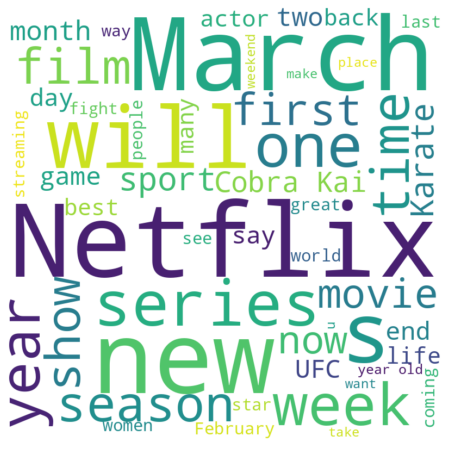

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df["merge_text"])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=STOPWORDS, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
# formater la colonne ‘publishedAt’
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['publishedAt'] = df['publishedAt'].dt.strftime('%d/%m/%Y')
df['publishedAt']

0      23/03/2023
1      23/03/2023
2      23/03/2023
3      23/03/2023
4      23/03/2023
          ...    
427    23/02/2023
428    23/02/2023
429    23/02/2023
430    23/02/2023
431    23/02/2023
Name: publishedAt, Length: 432, dtype: object

In [12]:
# import de pandas
import pandas as pd

# chargement de votre dataframe
df = pd.read_csv('output.csv')

# spécification de la colonne dans laquelle rechercher le mot
colonne = 'content'

# spécification du mot à rechercher
mot = 'Netflix'

# utilisation de la méthode str.contains() pour créer un masque de booléens
masque = df[colonne].str.contains(mot)

# comptage des articles correspondants
nombre_articles = masque.sum()

# affichage du résultat
print(f"Il y a {nombre_articles} articles dans le dataframe contenant le mot '{mot}' dans la colonne '{colonne}'.")
nombre_articles

Il y a 50 articles dans le dataframe contenant le mot 'Netflix' dans la colonne 'content'.


50

In [13]:
import pandas as pd

# Filtrer les articles contenant le mot "Netflix"
articles_contenant_mot = df[df['content'].str.contains('Netflix')]

# Convertir la colonne "publishedAt" en objet datetime et extraire la date
df['date'] = pd.to_datetime(df['publishedAt']).dt.date

# Regrouper les articles par date et compter le nombre d'articles par date
articles_par_date = articles_contenant_mot.groupby(df['date']).size().reset_index(name='nb_articles')

# Afficher les résultats
articles_par_date




,date,nb_articles
0,2023-02-23,2
1,2023-02-24,1
2,2023-02-26,2
3,2023-02-27,6
4,2023-02-28,10
5,2023-03-01,8
6,2023-03-02,4
7,2023-03-03,4
8,2023-03-05,3
9,2023-03-06,3


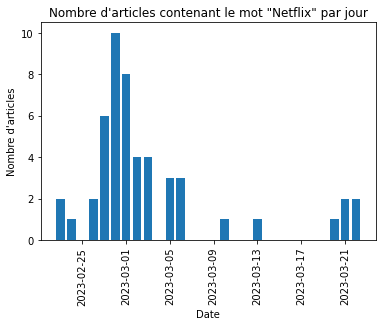

In [14]:
import matplotlib.pyplot as plt

# Tracer un graphique en barres du nombre d'articles par jour
plt.bar(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter un titre et des étiquettes d'axe
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')

# Faire pivoter les étiquettes de l'axe x pour les rendre lisibles
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


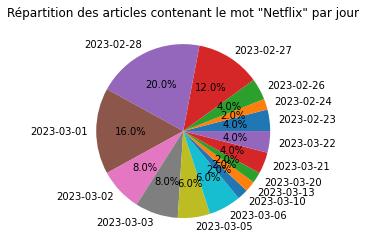

In [15]:
import matplotlib.pyplot as plt

# Tracer un graphique circulaire
plt.pie(articles_par_date['nb_articles'], labels=articles_par_date['date'], autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition des articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


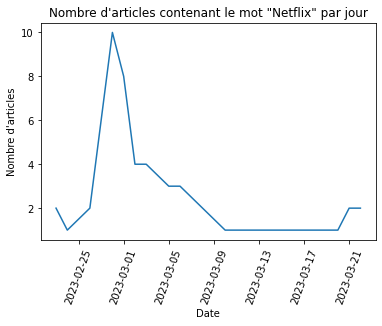

In [16]:
import matplotlib.pyplot as plt

# Tracer un graphique linéaire
plt.plot(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


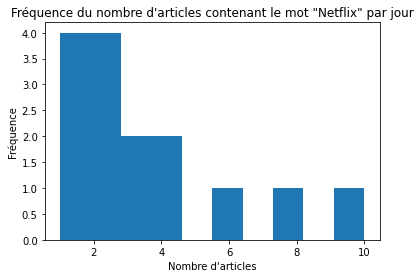

In [17]:
import matplotlib.pyplot as plt

# Tracer un histogramme
plt.hist(articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Nombre d\'articles')
plt.ylabel('Fréquence')
plt.title('Fréquence du nombre d\'articles contenant le mot "Netflix" par jour')

# Afficher le graphique
plt.show()


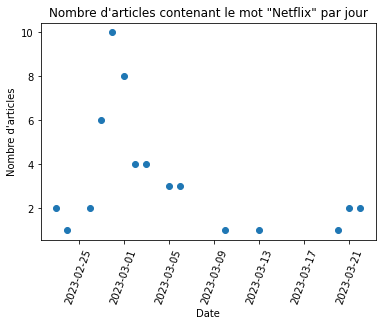

In [18]:
import matplotlib.pyplot as plt

# Tracer un nuage de points
plt.scatter(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


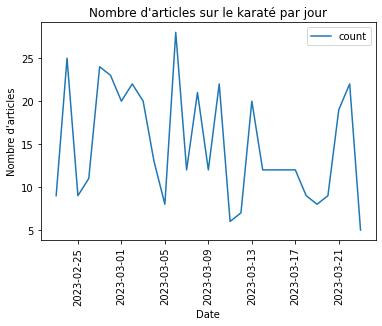

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('output.csv')
df['publishedAt'] = pd.to_datetime(df['publishedAt']).dt.date
articles_per_day = df.groupby('publishedAt').size().reset_index(name='count')
articles_per_day.plot(x='publishedAt', y='count')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur le karaté par jour')
plt.xticks(rotation=90)



plt.show()



In [20]:
# Search for articles about karate movies
df_films = df[df['title'].str.contains('film|cinéma|acteur', case=False)]

# Display results
df_films


,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
3,3,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,2023-03-23,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio..."
21,21,Sorrisi.com,Stefano Gradi,"Da “The night agent” a “Christian”, i nuovi fi...","Cosa vedere dal 22 al 28 marzo su Netflix, Pri...",https://www.sorrisi.com/tv/da-the-night-agent-...,https://www.sorrisi.com/wp-content/uploads/202...,2023-03-22,"Cosa vedere dal 22 al 28 marzo su Netflix, Pri..."
178,178,Yahoo Entertainment,Local Journalism Initiative,Tiny is a short film about a strong woman,"​Ritchie Hemphill, ’Nakwaxda’xw, is a West Coa...",https://ca.news.yahoo.com/tiny-short-film-stro...,https://s.yimg.com/cv/apiv2/social/images/yaho...,2023-03-09,"Ritchie Hemphill, Nakwaxdaxw, is a West Coast ..."
232,232,Nowymarketing.pl,Nowy Marketing,Jake Gyllenhaal promuje remake filmu „Road Hou...,Gwiazdą gali UFC 285 był aktor Jake Gyllenhaal...,"https://nowymarketing.pl/a/41305,jake-gyllenha...",https://nowymarketing.pl/i/articles/41305_orig...,2023-03-06,Jake Gyllenhaal zaskakuje fanów MMA\r\nNa widz...
283,283,Www.nu.nl,Superguide,Nieuw op Netflix: Deze films en series versche...,Elke week breidt Netflix het aanbod uit met ni...,https://www.nu.nl/film/6253751/nieuw-op-netfli...,https://media.nu.nl/m/fwuxmh6a9vaq_wd1280/nieu...,2023-03-03,Elke week breidt Netflix het aanbod uit met ni...
285,285,Slickdeals.net,Discombobulated,The Karate Kid (1984) (4K UHD Digital Film; MA...,"Amazon \n \nFor those interested \n \nNote, be...",https://slickdeals.net/f/16487029-the-karate-k...,https://static.slickdealscdn.com/attachment/8/...,2023-03-03,"Amazon\r\nFor those interested\r\nNote, be sur..."
307,307,Interia.pl,Radosław Nawrot,Broad Peak to historia na wstrząsający film. C...,"Kiedy w zeszłym roku wszedł na ekrany film ""Br...",https://sport.interia.pl/gory/news-broad-peak-...,https://i.iplsc.com/-/000GTHOWYE6NRU2Q-C429.jpg,2023-03-02,"Film ""Broad Peak"" stanowi pewien przeom. Na te..."
347,347,Leganerd.com,Davide Mirabello,Netflix marzo 2023: tutti i film e le serie TV...,"Ecco tutte le novità di marzo 203 su Netflix, ...",https://leganerd.com/2023/02/28/netflix-marzo-...,https://leganerd.com/wp-content/uploads/2023/0...,2023-02-28,"Ecco tutte le novità di marzo 203 su Netflix, ..."
373,373,Everyeye.it,Mattia Manneschi,"Sky e NOW, da Elvis a Bones and All: ecco i fi...","Il biopic di Elvis, le inquietanti atmosfere d...",https://cinema.everyeye.it/articoli/rubrica-sk...,https://images.everyeye.it/img-articoli/sky-no...,2023-02-27,"Elvis di Baz Luhrmann, il riuscitissimo biopic..."
397,397,Cineblog.it,Pietro Ferraro,Beyond Redemption: trailer e anticipazioni del...,"Tutto quello che c'è da sapere su ""Beyond Rede...",https://www.cineblog.it/post/beyond-redemption...,https://www.blogo.it/app/uploads/sites/3/2023/...,2023-02-25,"E uscito negli Stati Uniti, direttamente in Bl..."


In [21]:
df_grouped = df.groupby('publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-23,9
1,2023-02-24,25
2,2023-02-25,9
3,2023-02-26,11
4,2023-02-27,24
5,2023-02-28,23
6,2023-03-01,20
7,2023-03-02,22
8,2023-03-03,20
9,2023-03-04,13


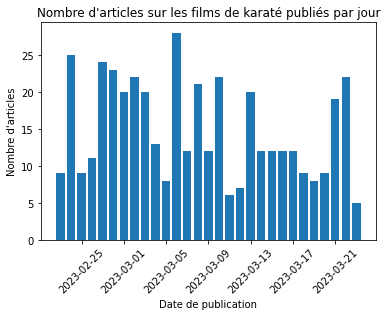

In [22]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Date de publication')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté publiés par jour')
plt.xticks(rotation=45)
plt.show()


In [23]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_grouped = df.resample('W', on='publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-26,54
1,2023-03-05,130
2,2023-03-12,108
3,2023-03-19,85
4,2023-03-26,55


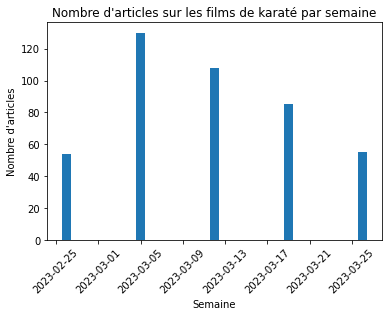

In [24]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Semaine')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté par semaine')
plt.xticks(rotation=45)
plt.show()

